In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Numpy

## Linear regression with one variable 

In [23]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
population  = data[:,0]
profit = y = data[:,1]
M = len(profit)

### Plotting de data

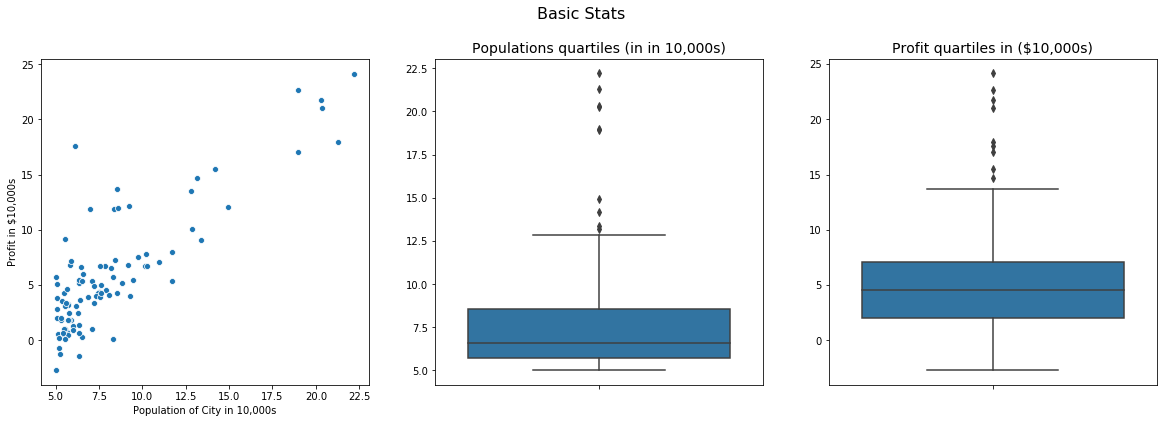

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Basic Stats', fontsize=16, y=1)

sns.scatterplot(x=population, y=profit, ax=ax1)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s')

sns.boxplot(y=population, ax=ax2)
ax2.set_title('Populations quartiles (in in 10,000s)', fontsize=14)

sns.boxplot(y=profit, ax=ax3)
ax3.set_title('Profit quartiles in ($10,000s)', fontsize=14)

plt.show()

### Gradient descent

In [35]:
iterations = 1500
alpha = 0.01

In [50]:
X = np.vstack((np.ones(M), population))

In [51]:
theta_0 = np.zeros(X.shape[0], dtype=float)

In [269]:
def computeCost(X, y, theta):
    J = ((X.T.dot(theta) - y)**2).sum()/(2 * M)
    return J

In [30]:
computeCost(X, y, theta_0)

32.072733877455676

In [31]:
computeCost(X, y, [-1., 2.])

54.24245508201238

In [270]:
def gradientDescent(X, y, initial_theta, alpha, iterations):
    theta = initial_theta.copy()
    J_history = []
    for i in range(0, iterations):
        theta = theta - (alpha/M) * X.dot(X.T.dot(theta) - y)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [49]:
theta, J_history = gradientDescent(X, y, theta_0, alpha, iterations)
theta

array([-3.63029144,  1.16636235])

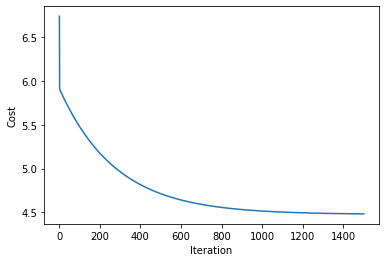

In [47]:
ax = sns.lineplot(x=[i for i in range(1,1501)], y=J_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
plt.show()

In [48]:
# Predicciones
predict1 = theta.T.dot([1, 3.5])
predict2 = theta.T.dot([1, 7])
predict1, predict2

(0.4519767867701767, 4.534245012944714)

### Debugging

In [54]:
def predict(theta, X):
    return X.T.dot(theta)

In [56]:
y_pred = predict(theta, X)

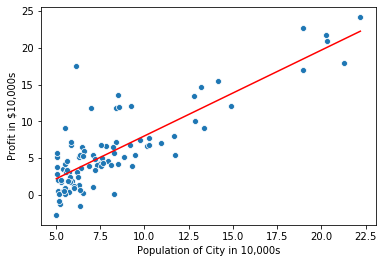

In [72]:
ax = sns.scatterplot(x=population, y=profit)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
sns.lineplot(X[1,:], y_pred, color='red')

plt.show()

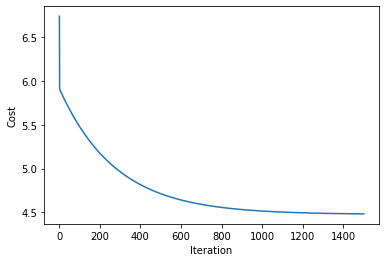

In [65]:
ax = sns.lineplot(x=[i for i in range(1,1501)], y=J_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
plt.show()

## Linear regression with multiple variables

In [263]:
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.dtype('d')).T
[size, bedrooms, y]  = data
M = len(y)

### Feature Normalization

In [267]:
mean_size, std_size = size.mean(), size.std()
mean_bedrooms, std_bedrooms = bedrooms.mean(), bedrooms.std()
size, bedrooms = (size - mean_size)/std_size, (bedrooms - mean_bedrooms)/std_bedrooms
X = np.vstack((np.ones(M), size, bedrooms))

### Gradient descent

In [273]:
alpha = .1
iterations = 1000
theta_0 = np.zeros(X.shape[0], dtype=np.dtype('d'))

In [274]:
J = computeCost(X, y, theta_0)
J

65591548106.45744

In [275]:
theta, J_history = gradientDescent(X, y, theta_0, alpha, iterations)
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

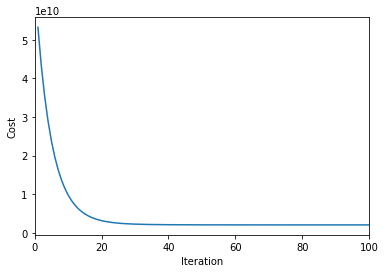

In [139]:
x = [i for i in range(1,1001)]
ax = sns.lineplot(x=x, y=J_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_xlim(0,100)
plt.show()

In [137]:
_, J_history_1 = gradientDescent(X, y, theta_0, .01, iterations)
_, J_history_2 = gradientDescent(X, y, theta_0, .03, iterations)
_, J_history_3 = gradientDescent(X, y, theta_0, .3, iterations)

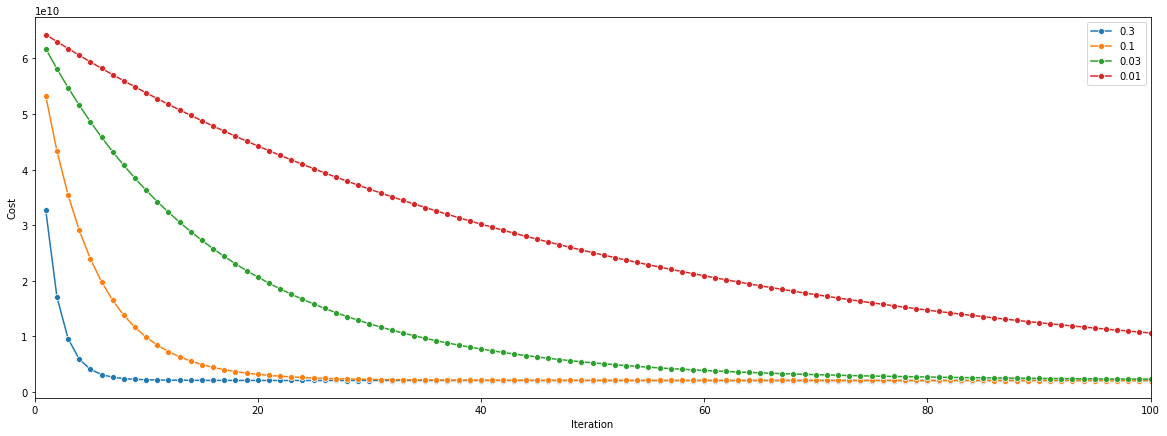

In [150]:
plt.figure(figsize=(20,7))
sns.lineplot(x=x, y=J_history_3, marker='o', label='0.3')
sns.lineplot(x=x, y=J_history, marker='o', label='0.1')
sns.lineplot(x=x, y=J_history_2, marker='o', label='0.03')
sns.lineplot(x=x, y=J_history_1, marker='o', label='0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xlim(0,100)
plt.show()

# Pytorch

In [317]:
import torch
torch.set_default_dtype(torch.double)

## Linear regression with one variable 

In [318]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
[population, y]  = data.T
population, y = torch.tensor(population), torch.tensor(y)
M = len(y)
alpha = .01
iterations = 1500

In [319]:
X = torch.cat([torch.ones(M), population])
X = torch.reshape(X, (2, M))

In [320]:
theta_0 = torch.zeros((1, X.shape[0]))

In [321]:
def computeCost(X, y, theta):
    J = ((torch.mm(theta, X) - y)**2).sum() / (2*M)
    return J.item()

In [322]:
computeCost(X, y, theta_0)

32.072733877455676

In [323]:
computeCost(X, y, torch.tensor([[-1., 2.]]))

54.24245508201238

In [324]:
def gradientDescent(X, y, initial_theta, alpha, iterations):
    theta = torch.clone(initial_theta)
    J_history = []
    for i in range(0, iterations):
        h = torch.mm(theta, X)
        theta -= (alpha/M) * torch.mm((h - y), X.T)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [325]:
theta, _ = gradientDescent(X, y, theta_0, alpha, iterations)

In [326]:
predict1 = torch.mm(torch.tensor([[1., 3.5]]), theta.T)
predict2 = torch.mm(torch.tensor([[1., 7.]]), theta.T)
predict1, predict2

(tensor([[0.4520]]), tensor([[4.5342]]))

## Linear regression with multiple variables

In [327]:
data = np.loadtxt('ex1data2.txt', delimiter=',').T
[size, bedrooms, y]  = data
size, bedrooms, y = torch.tensor(size), torch.tensor(bedrooms), torch.tensor(y)
M = len(y)

### Feature Normalization

In [328]:
mean_size, std_size = size.mean(), size.std()
mean_bedrooms, std_bedrooms = bedrooms.mean(), bedrooms.std()
size, bedrooms = (size - mean_size)/std_size, (bedrooms - mean_bedrooms)/std_bedrooms
X = torch.cat((torch.ones(M), size, bedrooms))
X = torch.reshape(X, (3, M))

### Gradient descent

In [329]:
alpha = .1
iterations = 1000
theta_0 = torch.zeros((1, X.shape[0]))

In [330]:
J = computeCost(X, y, theta_0)
J

65591548106.45744

In [331]:
theta, J_history = gradientDescent(X, y, theta_0, alpha, iterations)
theta

tensor([[340412.6596, 110631.0503,  -6649.4743]])

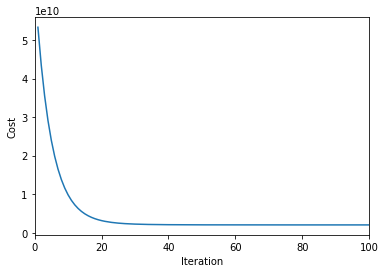

In [334]:
x = [i for i in range(1,1001)]
ax = sns.lineplot(x=x, y=J_history)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_xlim(0,100)
plt.show()

In [335]:
_, J_history_1 = gradientDescent(X, y, theta_0, .01, iterations)
_, J_history_2 = gradientDescent(X, y, theta_0, .03, iterations)
_, J_history_3 = gradientDescent(X, y, theta_0, .3, iterations)

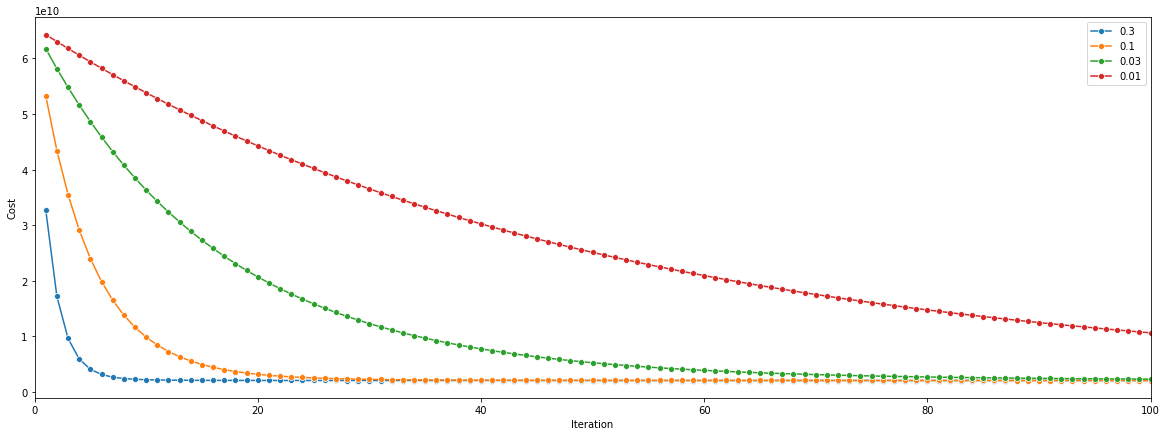

In [336]:
plt.figure(figsize=(20,7))
sns.lineplot(x=x, y=J_history_3, marker='o', label='0.3')
sns.lineplot(x=x, y=J_history, marker='o', label='0.1')
sns.lineplot(x=x, y=J_history_2, marker='o', label='0.03')
sns.lineplot(x=x, y=J_history_1, marker='o', label='0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xlim(0,100)
plt.show()